In [1]:
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

# Формулы расчёта

## Формула К. Вай и Э Вигнер
$\frac{W_{\beta,\gamma}}{W_0}=6.5 \cdot 10^{-2}[\tau_c^{-0.2}-(\tau_c+T)^{-0.2}]$

$W_{\beta,\gamma}$ - мощность остаточного тепловыделения ядерного реактора через время $\tau_c$ после его останова;

$W_0$ - мощность ядерного реактора до останова, на которой он работал в течение времени $Т$;

Время $\tau_c$ и $T$ выражено в секундах, а $W_{\beta,\gamma}$  и $W_0$— в одинаковых единицах мощности.
### Дополнительно
Точность неизвестна. Интревал для $\tau_c=[10...10^5]$ секунд

In [2]:
def W_vv(T0, tc, W0):
    if min(tc)<10 or max(tc)>10**5 : 
        print('Значение tc вне допустимого интервала')
        return None
    return 6.5/(10**2)*(1/(tc**0.2)-(1/((tc+T0)**0.2)))*W0

## Формула Уэя-Фингера
$\frac{W_{\beta,\gamma}}{W_0}=6.62 \cdot 10^{-2}[\tau_c^{-0.2}-(\tau_c+T)^{-0.2}]$

$W_{\beta,\gamma}$ - мощность остаточного тепловыделения ядерного реактора через время $\tau_c$ после его останова;

$W_0$ - мощность ядерного реактора до останова, на которой он работал в течение времени $Т$;

Время $\tau_c$ и $T$ выражено в секундах, а $W_{\beta,\gamma}$  и $W_0$— в одинаковых единицах мощности.
### Дополнительно
Точность неизвестна. Интревал для $\tau_c=[10...10^7]$

In [3]:
def W_uf(T0, tc, W0):
    if min(tc)<10 or max(tc)>10**7 : 
        print('Значение tc вне допустимого интервала')
        return None
    return 6.62/(10**2)*(1/(tc**0.2)-(1/((tc+T0)**0.2)))*W0

## Формула Унтер-майер и Уэллс
$
\frac{W_{\beta,\gamma}}{W_0}=10 \cdot \left( \frac{1}{(t+10)^{0.2}}-
\frac{1}{(t+T_0+10)^{0.2}}+
\frac{1}{(t+2 \cdot 10^{-1.2})^{0.2}}-\frac{1}{(t+T_0+2 \cdot 10^{-1.2})^{0.2}} \right)
$

In [15]:
def W_uu(T0, tc, W0):
    if min(tc)<1 or max(tc)>10**8 : 
        print('Значение tc вне допустимого интервала')
        return None
    return 10*(1/((tc+10)**0.2)-
               1/((tc+T0+10)**0.2)+
               1/((tc+2/(10**1.2))**0.2) - 
               1/((tc+T0+2/(10**1.2))**0.2))*W0

## Формула Пологих Б.Г.

### Дополнительно
Точность 50%. Интревал для $\tau_c=[0,1...10^8]$ секунд

## Формула Дементьев Б.А. 
$\frac{W_{\beta,\gamma}}{W_0}=7.2 \cdot 10^{-2} \cdot [\tau_c^{-0.2}-(\tau_c+T_0)^{-0.2}]$

### Дополнительно
Точность 25%. Интревал для $\tau_c=[10...10^5]$ секунд

In [5]:
def W_d(T0, tc, W0):
    if min(tc)<10 or max(tc)>10**5 : 
        print('Значение tc вне допустимого интервала')
        return None
    return 7.2/(10**2)*(1/(tc**0.2)-(1/((tc+T0)**0.2)))*W0

## Проверка

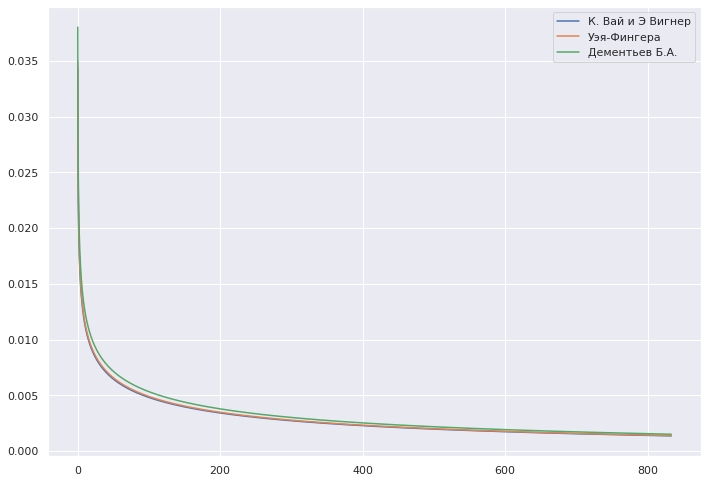

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

T=60*60*24*1 # 310 дней 
t=np.arange(10,5*10**4)
W0=3100 # МВт
ax = sns.lineplot(x=t/60,y=W_vv(T, t, W0)/W0, label='К. Вай и Э Вигнер')
ax = sns.lineplot(x=t/60,y=W_uf(T, t, W0)/W0, label ='Уэя-Фингера' )
ax = sns.lineplot(x=t/60,y=W_d(T, t, W0)/W0, label = 'Дементьев Б.А.')
#ax = sns.lineplot(x=t/60,y=W_uu(T, t, W0)/W0, label = 'Унтер-майер и Уэллс')